# Build a bridge between transcriptomic and phenotypic data in Arabidopsis

**Author: Yu Song** <br/>
**Semester: Spring 2020** <br/>
**Project area: Biochemistry** <br/>
**Updated date: 5/4/2020**

# Introduction
## Objective
Write a python function to automate the calculation of correlation value from transcriptome data and phenotypic data (climate data and lipid data) in Arabidopsis. Visualize the results using linear regression curve and heatmap, save and export the outputs in csv. file.

## Inputs
The inputs are two separate csv. files with many columns – accession ID, CS number, accession name, gene ID, lipid ID, RNAseq value, and phenotype value.<br/>
The first csv. file is "RNAseq value_climate value.csv" with accession information, gene expression data and climate data of origin.<br/>
The second csv. file is "RNAseq value_lipid value.csv" with accession information, gene expression data and lipid values.

## Outcomes
The output is a regression curve between latitude and climate data as well as some statistical parameters.<br/>
The output is a heatmap with gene ID, phenotype, and coorelation level.<br/>
The output file is a .csv file with three columns: gene ID, phenotype, and correlation level.
    
## Rationale
*Arabidopsis thaliana* is an excellent model to study genetic, cellular, and molecular biology of plants because of its small genome size, well-sequenced genomes. Genome wide association study (GWAS) is a powerful tool to dissect the genetic architecture of complex traits in plant. Our previous GWAS analysis based on lipidomic data of 320 natural Arabidopsis accessions revealed some candidate genes along with causative SNPs for lipid metabolism. Some SNPs are located in intron or intergenic region which may influence the gene expression level. We know there are some associations between transcriptome variation and lipid variation in natural Arabidopsis accessions. Kawakatsu et al. analyzed the transcriptomes from 727 accessions grown at 22°C. Exposito-Alonso et al. collected climate variables of origin for 517 natural accession which are potential indicator for cold tolerance of Arabidopsis. We hypothesized that with high correlation value calculated from RNAseq values of specific gene and lipid values, it is possible the gene is responsible for lipid metabolism. Also, if we find strong correlation between RNAseq values and climate values, it is possible the gene is related to cold tolerance.

## Sketch

<img src="sketch.png" alt="sketch_image" width="2000"/>


# Code

## 1.Modules

In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## 2.Read data files
Read the data file "RNAseq value_climate value.csv" and "RNAseq value_lipid value.csv" in the "Datasets" folder. "RNAseq value_climate value.csv" contains RNAseq value and climate variables, while "RNAseq value_lipid value.csv" contains RNAseq value, and lipid value.

In [2]:
# Read csv file "RNAseq value_climate value.csv" with accession information, RNAseq value, and climate variables
data1 = pd.read_csv('./Datasets/RNAseq value_climate value.csv')
# Read csv file "RNAseq value_lipid value.csv" with accession information, RNAseq value, and lipid value
data2 = pd.read_csv('./Datasets/RNAseq value_lipid value.csv')

In [3]:
data1.head() # Show first five rows of data1

,accession_id,accession_name,accession_cs_number,accession_longitude,accession_latitude,accession_country,AT2G16280,AT1G20330,AT3G05630,AT3G11170,...,Minimum Temperature of November,Minimum Temperature of December,Minimum Temperature of Februrary,Minimum Temperature of March,Minimum Temperature of April,Minimum Temperature of May,Minimum Temperature of June,Minimum Temperature of July,Minimum Temperature of August,Minimum Temperature of September
0,159,MAR2-3,CS77070,3.93333,47.3500,France,3567,3997,135,12507,...,29,1.0,-7.0,22.0,46,80,112,131,129,108
1,265,PYL-6,CS77198,-1.16667,44.6500,France,2688,4030,97,12222,...,57,34.0,28.0,50.0,69,98,130,147,146,130
2,403,Zdarec3,CS78873,16.26670,49.3667,Czech Republic,4866,4967,234,19972,...,-1,-37.0,-44.0,-14.0,24,68,99,113,112,81
3,763,Kar-1,CS76522,74.36670,42.3000,Kyrgyzstan,4422,5023,130,26538,...,-105,-166.0,-187.0,-108.0,-27,16,49,74,63,16
4,768,Zal-1,CS76634,76.35000,42.8000,Kyrgyzstan,1881,2668,270,9180,...,-122,-187.0,-210.0,-126.0,-41,7,41,66,57,10


In [4]:
# Examine data to see whether we have missing values or not
data1.isna().sum()

accession_id                                          0
accession_name                                        0
accession_cs_number                                   0
accession_longitude                                   0
accession_latitude                                    0
accession_country                                     0
AT2G16280                                             0
AT1G20330                                             0
AT3G05630                                             0
AT3G11170                                             0
AT3G11210                                             0
AT3G19260                                             0
AT3G56040                                             0
AT3G56080                                             0
AT4G11830                                             0
AT4G17600                                             0
AT4G23700                                             0
AT4G23710                                       

In [8]:
# Fill missing values with NaN
data1 = data1.fillna(method='backfill')

## 3.Accession_latitude vs Min Temperature of Coldest Month

Use accession_latitude as x-axis value, Min Temperature of Coldest Month as y-axis value<br/>
Scatterplot data points

Text(0, 0.5, 'Min Temperature of Coldest Month')

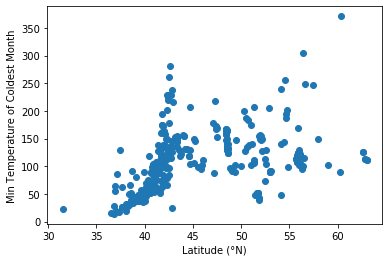

In [9]:
# Scatterplot the latitude and minimum temperature average within growing season
plt.figure(figsize=(6,4))
plt.scatter(data1["accession_latitude"], data1["Min Temperature of Coldest Month"])
plt.xlabel('Latitude (°N)')
plt.ylabel('Min Temperature of Coldest Month')

Build linear model between the two variables and get statistical outputs

In [10]:
# Fit linear model using linregress
fit_info = stats.linregress(data1["accession_latitude"], data1["Min Temperature of Coldest Month"])
# Display individual parameters
print('slope:',fit_info.slope)
print('intercept:',fit_info.intercept)
print('r:',fit_info.rvalue)
print('r-squared:',fit_info.rvalue**2)
print('p-value:',fit_info.pvalue)

slope: 3.4866077437934186
intercept: -48.47475415588707
r: 0.40741620274204643
r-squared: 0.16598796225674828
p-value: 1.6584101246532283e-14


Draw the linear regression curve and display the scatterplots and linear curve in the same graph

Text(0, 0.5, 'Min Temperature of Coldest Month')

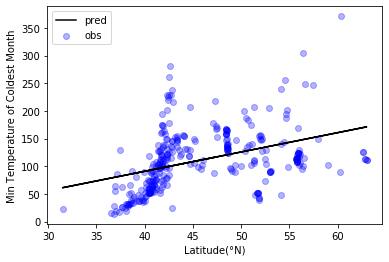

In [11]:
# Predict min temperature of coldest month based on accession_latitude 
y_pred = fit_info.intercept + fit_info.slope*data1["accession_latitude"]
# Figure of data and linear model
plt.figure(figsize=(6,4))
plt.scatter(data1["accession_latitude"], data1["Min Temperature of Coldest Month"], marker='o', color='b', alpha=0.3, label='obs')
plt.plot(data1["accession_latitude"], y_pred, '-k', label='pred')
plt.legend()
plt.xlabel('Latitude(°N)')
plt.ylabel('Min Temperature of Coldest Month')

### Calculate correlation coefficient (r) between latitude and all climate variables

In [14]:
# Show all climate headers
Climate_header = data1.columns[22:55] 
print(Climate_header) 

Index(['Mean Temperature of Coldest Quarter',
       'Mean Temperature of Warmest Quarter',
       'Max Temperature of Warmest Month', 'Min Temperature of Coldest Month',
       'Mean Temperature of Wettest Quarter',
       'Mean Temperature of Driest Quarter',
       'Maximum temperature average within growing season',
       'Minimum temperature average within growing season',
       'Maximum Temperature of January', 'Maximum Temperature of October',
       'Maximum Temperature of November', 'Maximum Temperature of December',
       'Maximum Temperature of Februrary', 'Maximum Temperature of March',
       'Maximum Temperature of April', 'Maximum Temperature of May',
       'Maximum Temperature of June', 'Maximum Temperature of July',
       'Maximum Temperature of August', 'Maximum Temperature of September',
       'Minimum Temperature of January', 'Minimum Temperature of October',
       'Minimum Temperature of November', 'Minimum Temperature of December',
       'Minimum Temperatu

In [17]:
# Calculate r and p-value for each climate variable using for loop function
list_0 = [] # initial r list
list_1 = [] # initial p-value list
for i in Climate_header:
    r = stats.pearsonr(data1["accession_latitude"],data1[i])
    list_0.append(round(r[0],3)) # round the number
    list_1.append(r[1])
print("r list is : " + str(list_0))
print("p-value list is : "+ str(list_1))

r list is : [-0.188, -0.23, 0.042, 0.407, -0.071, -0.005, -0.372, -0.153, -0.64, -0.786, -0.716, -0.672, -0.706, -0.73, -0.732, -0.551, -0.606, -0.73, -0.787, -0.832, -0.489, -0.512, -0.498, -0.426, -0.527, -0.551, -0.563, -0.436, -0.383, -0.467, -0.557, -0.586]
p-value list is : [0.0006405197511171458, 2.571236569705944e-05, 0.4501569001597562, 1.6584101246535016e-14, 0.19987225977954393, 0.934318351472485, 3.761834072467908e-12, 0.005410791008321588, 4.124887129214215e-39, 6.219156121645872e-70, 1.117056663842877e-52, 2.392781169630383e-44, 1.1042390157967012e-50, 1.0851728639488407e-55, 4.635691001917841e-56, 2.0853594225364998e-27, 3.340260265680368e-34, 1.4036663668777822e-55, 4.310418792426452e-70, 4.4521444244501347e-85, 4.3988199354691024e-21, 3.108469934079304e-23, 6.81126353298122e-22, 7.774632801874705e-16, 8.45475939035677e-25, 2.607249786417329e-27, 9.947521540740287e-29, 1.4256629151946549e-16, 6.803731045933899e-13, 3.9091874936779007e-19, 4.569628510461325e-28, 1.454885

In [18]:
# Create array with climate type, r, and p-value, the new array is ready for writing and saving as csv file
rows = np.array([]) # initial array
for i in range(len(Climate_header)):
    lists = [Climate_header[i],list_0[i],list_1[i]]
    rows = np.append(rows,lists)
rows = np.reshape(rows, (-1, 3)) # new array with 3 columns (climate type, r, and p-value)
print(rows)

[['Mean Temperature of Coldest Quarter' '-0.188' '0.0006405197511171458']
 ['Mean Temperature of Warmest Quarter' '-0.23' '2.571236569705944e-05']
 ['Max Temperature of Warmest Month' '0.042' '0.4501569001597562']
 ['Min Temperature of Coldest Month' '0.407' '1.6584101246535016e-14']
 ['Mean Temperature of Wettest Quarter' '-0.071' '0.19987225977954393']
 ['Mean Temperature of Driest Quarter' '-0.005' '0.934318351472485']
 ['Maximum temperature average within growing season' '-0.372'
  '3.761834072467908e-12']
 ['Minimum temperature average within growing season' '-0.153'
  '0.005410791008321588']
 ['Maximum Temperature of January' '-0.64' '4.124887129214215e-39']
 ['Maximum Temperature of October' '-0.786' '6.219156121645872e-70']
 ['Maximum Temperature of November' '-0.716' '1.117056663842877e-52']
 ['Maximum Temperature of December' '-0.672' '2.392781169630383e-44']
 ['Maximum Temperature of Februrary' '-0.706' '1.1042390157967012e-50']
 ['Maximum Temperature of March' '-0.73' '1.08

### Save calculated results in a csv. file

In [19]:
import csv  # import csv function for writing and saving csv file
# Column names  
column_names = ["Climate type","r","p-value"] # Define column names
# name of csv file  
filename = "correlation between latitude and climate variables.csv" # Define file name
# writing to csv file  
with open(filename, 'w') as csvfile:  
    csvwriter = csv.writer(csvfile)  
    csvwriter.writerow(column_names)
    csvwriter.writerows(rows) # the contents in the csv file are from the new array

## 4.RNAseq value vs Climate variables

### Calculate r and p-value between RNAseq value and climate variables

In [20]:
# Show gene ID
RNAseq_header = data1.columns[6:22]
print(RNAseq_header)

Index(['AT2G16280', 'AT1G20330', 'AT3G05630', 'AT3G11170', 'AT3G11210',
       'AT3G19260', 'AT3G56040', 'AT3G56080', 'AT4G11830', 'AT4G17600',
       'AT4G23700', 'AT4G23710', 'AT5G16230', 'AT5G16240', 'AT5G22500',
       'AT5G59590'],
      dtype='object')


In [21]:
# Calculate r and p-value from RNAseq value and cliamte variables using for loop function
array_r = np.array([]) #initial r array
array_p = np.array([]) #initial p-value array
for j in Climate_header: # Outer loop for 32 climate types
    list_r = [] #initial r list
    list_p = [] #initial p-value list
    for i in RNAseq_header: # Inner loop for 16 genes
        r = stats.pearsonr(data1[i],data1[j])
        list_r.append(round(r[0],3))
        list_p.append(round(r[1],4))
    
    array_r = np.append(array_r,list_r)
    array_p = np.append(array_p,list_p)
array_r = np.reshape(array_r, (-1, 16)) # Change shape of the r array for heatmap, array with 32 rows, 16 columns
print(array_r)
array_p = np.reshape(array_p, (-1, 16)) # Change shape of the p-value array for heatmap, array with 32 rows, 16 columns
print(array_p)

[[-0.06  -0.097 -0.073 -0.11   0.039 -0.063 -0.054  0.068  0.128 -0.092
  -0.094  0.187  0.128 -0.034  0.03   0.034]
 [-0.059 -0.112 -0.098 -0.093  0.013 -0.045 -0.079  0.04   0.135 -0.086
  -0.061  0.138  0.136 -0.041 -0.017  0.105]
 [-0.094 -0.102 -0.074 -0.125  0.039 -0.035 -0.056  0.117  0.113 -0.127
  -0.042  0.044  0.033 -0.043  0.012  0.065]
 [-0.123 -0.038 -0.031 -0.102  0.108 -0.039 -0.069  0.135 -0.055 -0.118
  -0.072 -0.037 -0.016  0.017  0.11  -0.044]
 [-0.041 -0.095 -0.074 -0.093  0.014 -0.02  -0.102  0.027  0.104 -0.091
  -0.056  0.124  0.108 -0.053 -0.026  0.077]
 [-0.035 -0.092 -0.042 -0.086  0.005  0.002 -0.12   0.013  0.091 -0.089
  -0.049  0.113  0.096 -0.067 -0.042  0.072]
 [ 0.001 -0.017 -0.105  0.012 -0.005 -0.04   0.14   0.032  0.066  0.048
   0.012  0.085  0.082 -0.031 -0.059 -0.037]
 [ 0.039  0.025 -0.044  0.03   0.034 -0.05   0.107  0.006  0.083  0.014
   0.013  0.026  0.073 -0.067  0.003 -0.013]
 [ 0.107  0.061 -0.023  0.004  0.049 -0.119  0.005 -0.011  0.176

### Plot the r results in Heatmap

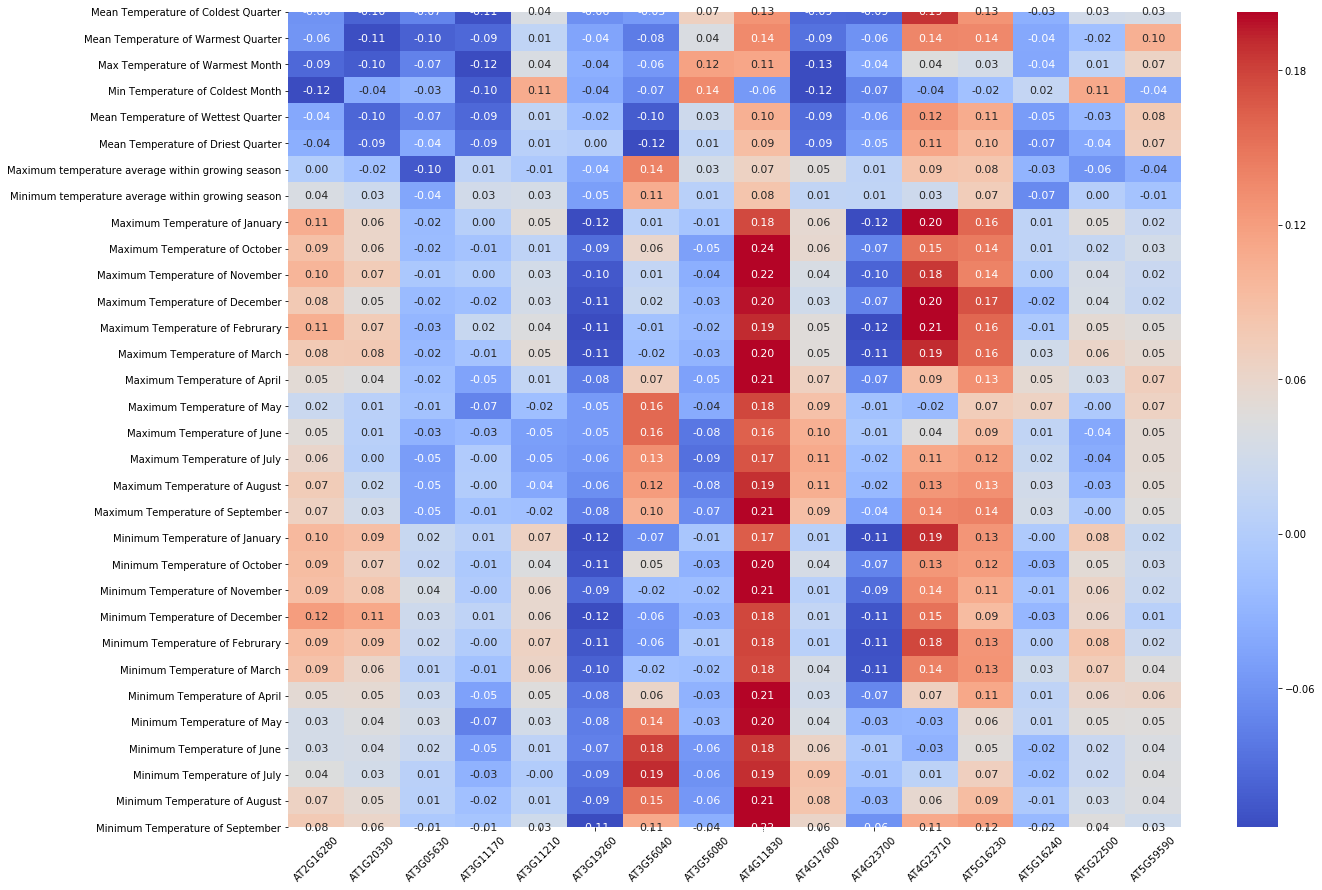

In [22]:
# Plot the r value between gene and climate in heatmap
plt.rcParams['figure.figsize'] = (20.0, 15.0) # Set the figure size
plt.xlabel("Values on X axis")
plt.ylabel('Values on Y axis')
xticks = np.array(RNAseq_header) # Define x-axis with gene ID
yticks = np.array(Climate_header) # Define y-axis with climate type
# Use seaborn function to build heatmap
heat_map = sns.heatmap(array_r, cmap='coolwarm', xticklabels=xticks, yticklabels=yticks, robust=True, annot=True, fmt=".2f",annot_kws={'size':11})
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=45) # Rotate xticklabels
plt.show()

### Save r and p-value in separate csv file

In [23]:
# Save r in a csv file
newarray_r = np.column_stack((Climate_header, array_r)) # Add climate headers in front of the fisrt column of array_r
#print(newarray_r)
# Column names  
column_names_1 = RNAseq_header.insert(0,"Climate type") # Insert "Climate type" in front of the fisrt element of RNAseq_header
# name of csv file  
filename_1 = "r between RNAseq value and climate variables.csv"
# writing to csv file  
with open(filename_1, 'w') as csvfile:  
    csvwriter = csv.writer(csvfile)  
    csvwriter.writerow(column_names_1)
    csvwriter.writerows(newarray_r)

In [24]:
# Save p-value in a csv file
newarray_p = np.column_stack((Climate_header, array_p)) # Add climate headers in front of the fisrt column of array_p
#print(newarray_p)
# Column names  
column_names_2 = RNAseq_header.insert(0,"Climate type") # Insert "Climate type" in front of the fisrt element of RNAseq_header
# name of csv file  
filename_2 = "p-value between RNAseq value and climate variables.csv"
# writing to csv file  
with open(filename_2, 'w') as csvfile:  
    csvwriter = csv.writer(csvfile)  
    csvwriter.writerow(column_names_2)
    csvwriter.writerows(newarray_p)

## 5.RNAseq value vs lipid value

### Calculate r and p-value between RNAseq value and lipid value

In [25]:
# Read the csv. file and show first 5 rows of the table
data2.head()

,accession_id,accession_name,accession_cs_number,accession_longitude,accession_latitude,accession_country,AT2G16280,AT1G20330,AT3G05630,AT3G11170,...,DGDG(18:2/18:3),DGDG(18:1/18:3),MGDG(18:3/16:2),PC(16:0/16:1),PC(16:0/16:0),PE(20:1/18:3),PG(18:2/16:0),SQDG(32:0),SQDG(34:3),SQDG(36:6)
0,159,MAR2-3,CS77070,3.93333,47.3500,France,3567,3997,135,12507,...,0.348617,0.381028,0.395499,0.102897,0.101659,0.009082,0.572889,0.011737,0.445252,0.145831
1,403,Zdarec3,CS78873,16.26670,49.3667,Czech Republic,4866,4967,234,19972,...,0.309912,0.276392,0.430617,0.136768,0.103690,0.010941,0.656064,0.008684,0.397440,0.139980
2,424,Draha2,CS76812,16.28150,49.4112,Czech Republic,2608,4820,130,13240,...,0.271962,0.330842,0.384925,0.142193,0.126473,0.009844,0.659698,0.008798,0.428563,0.148578
3,428,Borky1,CS76718,16.23200,49.4030,Czech Republic,2601,3697,203,13509,...,0.295187,0.348547,0.331584,0.097563,0.111021,0.009391,0.722958,0.008025,0.453207,0.128633
4,997,Ale-Stenar-56-14,CS76653,14.05000,55.3833,Sweden,3132,3189,134,8083,...,0.289260,0.338248,0.376317,0.147499,0.164717,0.011798,0.665964,0.019379,0.531383,0.133083


In [26]:
# Examine data to see whether we have NaN values or not
data2.isna().sum()

accession_id               0
accession_name             0
accession_cs_number        0
accession_longitude        0
accession_latitude         0
accession_country          0
AT2G16280                  0
AT1G20330                  0
AT3G05630                  0
AT3G11170                  0
AT3G11210                  0
AT3G19260                  0
AT3G56040                  0
AT3G56080                  0
AT4G11830                  0
AT4G17600                  0
AT4G23700                  0
AT4G23710                  0
AT5G16230                  0
AT5G16240                  0
AT5G22500                  0
AT5G59590                  0
acMGDG(18:3-2O/36:8-2O)    0
acMGDG(18:3-3O/36:8-2O)    0
Campesterol-Glc(16:0)      0
Campesterol-Glc(18:3)      0
Campesterol-Glc(18:2)      0
GlcCer(34:1)-2             0
GlcCer(34:1)-3             0
GlcCer(40:1)-3             0
GlcCer(42:2)-3             0
Campesterol-Glc            0
DGDG(18:3/7:1-2O)          0
DGDG(18:3/16:2)            0
DGDG(18:3/16:1

In [27]:
# Show gene ID
rnaseq_header = data2.columns[6:22]
print(RNAseq_header)
# Show lipid name
lipid_header = data2.columns[22:]
print(lipid_header)

Index(['AT2G16280', 'AT1G20330', 'AT3G05630', 'AT3G11170', 'AT3G11210',
       'AT3G19260', 'AT3G56040', 'AT3G56080', 'AT4G11830', 'AT4G17600',
       'AT4G23700', 'AT4G23710', 'AT5G16230', 'AT5G16240', 'AT5G22500',
       'AT5G59590'],
      dtype='object')
Index(['acMGDG(18:3-2O/36:8-2O)', 'acMGDG(18:3-3O/36:8-2O)',
       'Campesterol-Glc(16:0)', 'Campesterol-Glc(18:3)',
       'Campesterol-Glc(18:2)', 'GlcCer(34:1)-2', 'GlcCer(34:1)-3',
       'GlcCer(40:1)-3', 'GlcCer(42:2)-3', 'Campesterol-Glc',
       'DGDG(18:3/7:1-2O)', 'DGDG(18:3/16:2)', 'DGDG(18:3/16:1)',
       'DGDG(18:2/18:3)', 'DGDG(18:1/18:3)', 'MGDG(18:3/16:2)',
       'PC(16:0/16:1)', 'PC(16:0/16:0)', 'PE(20:1/18:3)', 'PG(18:2/16:0)',
       'SQDG(32:0)', 'SQDG(34:3)', 'SQDG(36:6)'],
      dtype='object')


In [28]:
# Calculate r and p-value from RNAseq value and cliamte variables using for loop function
array_R = np.array([]) #initial r array
array_P = np.array([]) #initial p-value array
for j in lipid_header: #outer loop for 23 lipid species
    list_R = []
    list_P = []
    for i in rnaseq_header: #inner loop for 16 genes
        R = stats.pearsonr(data2[i],data2[j])
        list_R.append(round(R[0],3))
        list_P.append(round(R[1],4))
    
    array_R = np.append(array_R,list_R)
    array_P = np.append(array_P,list_P)
array_R = np.reshape(array_R, (-1, 16)) #Change r array shape with 23 rows and 16 columns, which is ready for heatmap generating
print(array_R)
array_P = np.reshape(array_P, (-1, 16)) #Change p-value array shape with 23 rows and 16 columns, which is ready for heatmap generating
print(array_P)

[[ 0.022  0.028 -0.059  0.014 -0.058 -0.077  0.088  0.121  0.085 -0.021
  -0.019 -0.054  0.032  0.083 -0.068 -0.037]
 [ 0.009  0.016 -0.048  0.026 -0.083 -0.075  0.071  0.096  0.115 -0.017
  -0.016 -0.057  0.055  0.084 -0.064 -0.038]
 [-0.085 -0.132 -0.015  0.06  -0.006 -0.084  0.166  0.101  0.026  0.123
  -0.049 -0.045  0.162  0.019  0.025 -0.021]
 [-0.006 -0.229 -0.041 -0.052 -0.067 -0.025  0.098  0.04   0.072  0.012
  -0.007 -0.124  0.126  0.043 -0.025 -0.033]
 [-0.09  -0.251 -0.012  0.091  0.073 -0.012  0.144  0.098  0.115  0.164
   0.033 -0.096  0.096  0.091  0.094  0.055]
 [ 0.077  0.06   0.048  0.128  0.126  0.039 -0.036 -0.122  0.027  0.029
   0.024  0.069  0.038  0.146  0.233  0.102]
 [ 0.13   0.16   0.006  0.085 -0.043 -0.101  0.106 -0.068 -0.041  0.037
  -0.006 -0.007 -0.042 -0.02   0.034 -0.035]
 [ 0.106  0.136 -0.025  0.093  0.074  0.033  0.06  -0.15  -0.024  0.14
  -0.146  0.098  0.139  0.089  0.089 -0.073]
 [-0.032  0.075 -0.015  0.045 -0.033 -0.031  0.133  0.132  0.116 

### Plot the r results in Heatmap

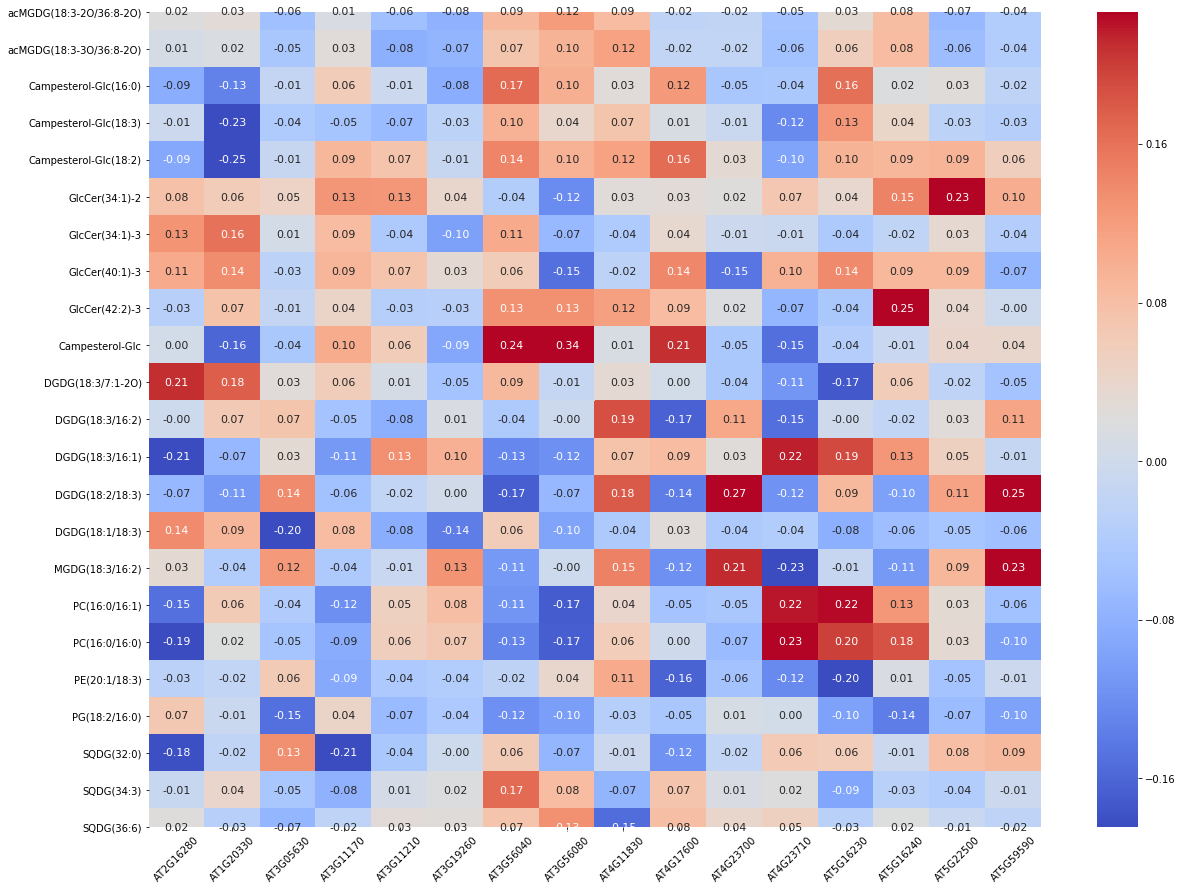

In [29]:
# Plot the r value between gene and climate in heatmap
plt.xlabel("Values on X axis")
plt.ylabel('Values on Y axis')
xticks = np.array(rnaseq_header) # Define y-axis with gene ID
yticks = np.array(lipid_header) # Define y-axis with lipid name
heat_map_2 = sns.heatmap(array_R, cmap='coolwarm', xticklabels=xticks, yticklabels=yticks, robust=True, annot=True, fmt=".2f",annot_kws={'size':11})
plt.rcParams['figure.figsize'] = (20.0, 10.0)
heat_map_2.set_xticklabels(heat_map_2.get_xticklabels(), rotation=45)
plt.show()

### Save r and p-value in separate csv file

In [30]:
# Save r in a csv file
newarray_R = np.column_stack((lipid_header, array_R)) # Add lipid headers in front of the fisrt column of array_R
#print(newarray_R)
# Column names  
column_names_3 = RNAseq_header.insert(0,"Lipid name") # Insert "Lipid name" in front of the fisrt element of RNAseq_header
# name of csv file  
filename_3 = "r between RNAseq value and lipid value.csv"
# writing to csv file  
with open(filename_3, 'w') as csvfile:  
    csvwriter = csv.writer(csvfile)  
    csvwriter.writerow(column_names_3)
    csvwriter.writerows(newarray_R)

In [31]:
# Save p-value in a csv file
newarray_P = np.column_stack((lipid_header, array_P))
#print(newarray_P)
# Column names  
column_names_4 = RNAseq_header.insert(0,"Lipid name")    
# name of csv file  
filename_4 = "p-value between RNAseq value and lipid value.csv"
# writing to csv file  
with open(filename_4, 'w') as csvfile:  
    csvwriter = csv.writer(csvfile)  
    csvwriter.writerow(column_names_4)
    csvwriter.writerows(newarray_P)

# Conclusion

- We drew regression curve between latitude and different climate variables and calculated correlation coefficient (r) and p-value for each climate type. There are strong correlations and good linear regressions for some climate variables, like the correlation between latitude and min temperature of coldest month.</br>
- We calculated correlation coefficient (r) and p-value between gene expression level and climate variable (temperature) and found some weak correlation, indicating some genes may be involved in cold tolerance of Arabidopsis.</br>
- We calculated correlation coefficient (r) and p-value between gene expression level and lipid level and found some weak correlation, indicating these genes may be involved in lipid metabolism of Arabidopsis.</br>
- Correlation coefficient is a good indicator for the association between gene expression level and phenotypic variable. Although most r values are realtively low, it is a good start to explore gene function for plant traits.

# Future challenge

1. In this project, I downloaded RNAseq value of gene of interest in natural accession Arabidopsis lines online. However, if we want to do a large genome scale screen, a complete set of genes need to be incorporated into the calculation. For this goal, we need to automatically download csv. file with RNAseq value for all the genes and read each csv file. I will find some codes to bulk download web data.
2. Most of the associations between gene expression level and plant traits are weak in this study, more correction or optimization need to be applied to find more significant associations and some other statistical methods need to be applied in the future.

# References
1. Kawakatsu, Taiji, et al. "Epigenomic diversity in a global collection of Arabidopsis thaliana accessions." *Cell* 166.2 (2016): 492-505.<br/>
2. Exposito-Alonso, Moises, et al. "Natural selection on the Arabidopsis thaliana genome in present and future climates." Nature 573.7772 (2019): 126-129.